In [1]:
import warnings
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from src import utils, plotting
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
ticker_1 = "GC=F"
ticker_2 = "^GSPC"
ticker_3 = "CL=F"
period = "23y"
stock_1 = yf.Ticker(ticker_1.upper()).history(period=period).dropna()
stock_2 = yf.Ticker(ticker_2.upper()).history(period=period).dropna()
stock_3 = yf.Ticker(ticker_3.upper()).history(period=period).dropna()

NameError: name 'start_date' is not defined

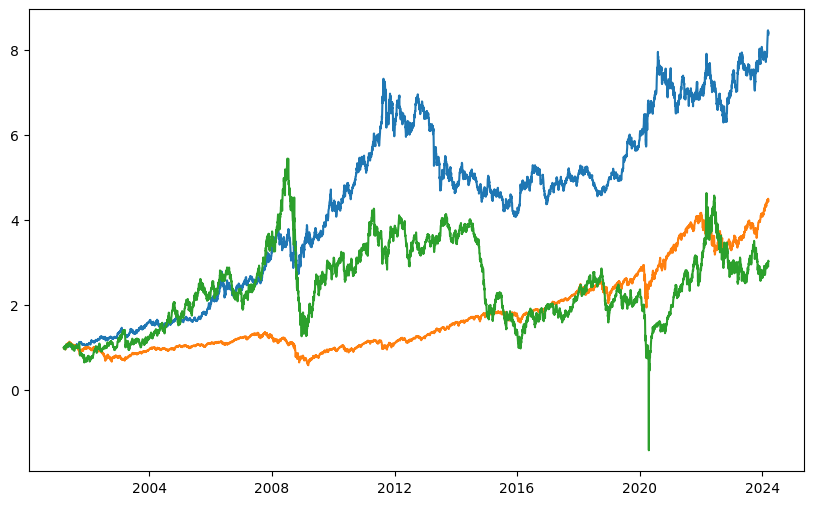

In [3]:
from src.plotting import plot_n_chart_comparison
plot_n_chart_comparison([(ticker_1, stock_1), (ticker_2, stock_2), (ticker_3, stock_3)], log_scale=False)

In [24]:
stock_1.index[-1].date().strftime("%Y/%-m/%-d")

'2024/3/15'

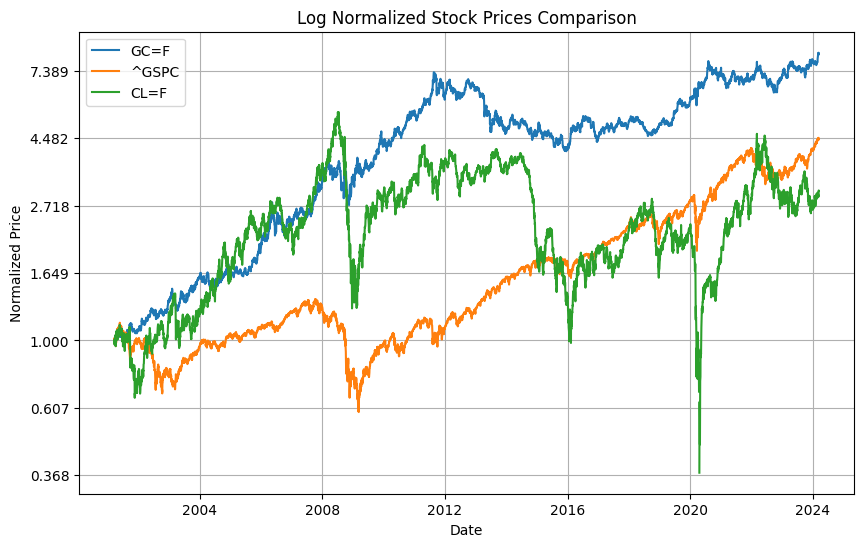

GC=F / ^GSPC correlation: 0.74688249
GC=F / CL=F correlation:  0.50038580
^GSPC / CL=F correlation: 0.15423993


In [7]:
plot_n_chart_comparison([(ticker_1, stock_1), (ticker_2, stock_2), (ticker_3, stock_3)], log_scale=True)